<a href="https://colab.research.google.com/github/Vagarh/IUdigital/blob/main/Evidencia_de_Aprendizaje_1_Taller_Casos_de_estudio_de_diferentes_tipos_de_visualizaci%C3%B3n_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
# data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# data viz
import matplotlib.pyplot as plt
from matplotlib import rcParams

plt.style.use("ggplot")
rcParams['figure.figsize'] = (12, 6)


# Extracción de datos del CSV

In [23]:
url = '/content/retail.csv'

# Leer el archivo de texto en un DataFrame
df = pd.read_csv(url,delimiter=";")

# Mostrar el DataFrame
print(df)

                 Categoría           Ciudad Fabricante Fecha de envío  \
0      Material de oficina  Cruzeiro do Sul     Boston      6/04/2021   
1               Mobiliario       Rio Branco      Dania     11/10/2021   
2      Material de oficina       Rio Branco      Avery     11/10/2021   
3               Mobiliario       Rio Branco      Tenex     18/06/2019   
4               Mobiliario       Rio Branco      Safco     18/06/2019   
...                    ...              ...        ...            ...   
10249           Tecnología          Cabimas     Konica     22/10/2019   
10250           Tecnología          Cabimas      Canon     22/10/2019   
10251  Material de oficina          Cabimas      Smead     22/10/2019   
10252  Material de oficina          Cabimas      Elite     22/10/2019   
10253  Material de oficina          Cabimas      Accos     22/10/2019   

      Fecha del pedido Ganancia (agrupación)  Id. del pedido Método de envío  \
0            2/04/2021                  $20

In [24]:
df.head(5)

,Categoría,Ciudad,Fabricante,Fecha de envío,Fecha del pedido,Ganancia (agrupación),Id. del pedido,Método de envío,Nombre del cliente,Nombre del producto,País/Región,Provincia/Estado/Departamento,Región,Segmento,Subcategoría,Cantidad,Descuento,Ganancia,Ventas
0,Material de oficina,Cruzeiro do Sul,Boston,6/04/2021,2/04/2021,$200,MX-2021-111899,Estándar,Araceli Manzanares,"Boston Rotuladores, Tamaños variados",Brasil,Acre,Sur,Empresa,Arte,3,0%,$206,$591
1,Mobiliario,Rio Branco,Dania,11/10/2021,8/10/2021,$800,MX-2021-113922,Rápido,Benjamín Saavedra,"Dania Conjunto de estantes, Metal",Brasil,Acre,Sur,Cliente,Librerías,2,0%,$923,$2.251
2,Material de oficina,Rio Branco,Avery,11/10/2021,8/10/2021,$0,MX-2021-113922,Rápido,Benjamín Saavedra,"Avery Anillas, Transparente",Brasil,Acre,Sur,Cliente,Carpetas,5,0%,$11,$129
3,Mobiliario,Rio Branco,Tenex,18/06/2019,14/06/2019,$0,MX-2019-163888,Estándar,Alejandro Trejo,"Tenex Bandeja apiladora, Negro",Brasil,Acre,Sur,Cliente,Mobiliario,3,0%,$95,$505
4,Mobiliario,Rio Branco,Safco,18/06/2019,14/06/2019,$600,MX-2019-163888,Estándar,Alejandro Trejo,"Safco Vitrina, Convencional",Brasil,Acre,Sur,Cliente,Librerías,3,0%,$641,$3.377


# Preprocesamiento de datos

* ¿Qué tipo de datos tiene la base de datos proporcionada? R// son datos tipo objeto.

* ¿Son estos datos en crudo o procesados? R// son datos crudos el atributo y tipo no concuerda por ejemplo una fecha es guardado como objeto.

* ¿Es claro el significado de cada una de las columnas y sus categorías en la base de datos? si, se procede a hacer las transformaciones de los datos.

In [25]:
colnames=df.columns.values
print(colnames)

['Categoría' 'Ciudad' 'Fabricante' 'Fecha de envío' 'Fecha del pedido'
 'Ganancia (agrupación)' 'Id. del pedido' 'Método de envío'
 'Nombre del cliente' 'Nombre del producto' 'País/Región'
 'Provincia/Estado/Departamento' 'Región' 'Segmento' 'Subcategoría'
 'Cantidad' 'Descuento' 'Ganancia' 'Ventas']


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10254 entries, 0 to 10253
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Categoría                      10254 non-null  object
 1   Ciudad                         10254 non-null  object
 2   Fabricante                     10254 non-null  object
 3   Fecha de envío                 10254 non-null  object
 4   Fecha del pedido               10254 non-null  object
 5   Ganancia (agrupación)          10254 non-null  object
 6   Id. del pedido                 10254 non-null  object
 7   Método de envío                10254 non-null  object
 8   Nombre del cliente             10254 non-null  object
 9   Nombre del producto            10254 non-null  object
 10  País/Región                    10254 non-null  object
 11  Provincia/Estado/Departamento  10254 non-null  object
 12  Región                         10254 non-null  object
 13  S

In [27]:
df.shape

(10254, 19)

Se realiza cambio de tipo de variables segun en caso, ya que la mayoria se identificaron como objetos, sin embargo se observa datos de tipo fecha, int y float no caracterizadas.

In [28]:
# convertir a valores  Categoricos a Fechas.
from datetime import datetime
df['Fecha de envío'] = pd.to_datetime(df['Fecha de envío'])
df['Fecha del pedido'] = pd.to_datetime(df["Fecha del pedido"])


<ipython-input-28-aa6bf6312adc>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Fecha de envío'] = pd.to_datetime(df['Fecha de envío'])
<ipython-input-28-aa6bf6312adc>:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Fecha del pedido'] = pd.to_datetime(df["Fecha del pedido"])


In [29]:
# Eliminar los caracteres "$" y "%" y convertir a valores numéricos.
df['Ventas'] = df['Ventas'].str.replace('$', '').astype(float)
df['Descuento'] = df['Descuento'].str.replace('%', '').astype(float)
df['Ganancia (agrupación)'] = df['Ganancia (agrupación)'].str.replace('$', '').astype(float)
df['Ganancia'] = df['Ganancia'].str.replace('$', '').astype(float)

<ipython-input-29-3c9825f00e4a>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Ventas'] = df['Ventas'].str.replace('$', '').astype(float)
<ipython-input-29-3c9825f00e4a>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Ganancia (agrupación)'] = df['Ganancia (agrupación)'].str.replace('$', '').astype(float)
<ipython-input-29-3c9825f00e4a>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Ganancia'] = df['Ganancia'].str.replace('$', '').astype(float)


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10254 entries, 0 to 10253
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Categoría                      10254 non-null  object        
 1   Ciudad                         10254 non-null  object        
 2   Fabricante                     10254 non-null  object        
 3   Fecha de envío                 10254 non-null  datetime64[ns]
 4   Fecha del pedido               10254 non-null  datetime64[ns]
 5   Ganancia (agrupación)          10254 non-null  float64       
 6   Id. del pedido                 10254 non-null  object        
 7   Método de envío                10254 non-null  object        
 8   Nombre del cliente             10254 non-null  object        
 9   Nombre del producto            10254 non-null  object        
 10  País/Región                    10254 non-null  object        
 11  Provincia/Estad

In [31]:
df.head(5)

,Categoría,Ciudad,Fabricante,Fecha de envío,Fecha del pedido,Ganancia (agrupación),Id. del pedido,Método de envío,Nombre del cliente,Nombre del producto,País/Región,Provincia/Estado/Departamento,Región,Segmento,Subcategoría,Cantidad,Descuento,Ganancia,Ventas
0,Material de oficina,Cruzeiro do Sul,Boston,2021-06-04,2021-02-04,200.0,MX-2021-111899,Estándar,Araceli Manzanares,"Boston Rotuladores, Tamaños variados",Brasil,Acre,Sur,Empresa,Arte,3,0.0,206.0,591.000
1,Mobiliario,Rio Branco,Dania,2021-11-10,2021-08-10,800.0,MX-2021-113922,Rápido,Benjamín Saavedra,"Dania Conjunto de estantes, Metal",Brasil,Acre,Sur,Cliente,Librerías,2,0.0,923.0,2.251
2,Material de oficina,Rio Branco,Avery,2021-11-10,2021-08-10,0.0,MX-2021-113922,Rápido,Benjamín Saavedra,"Avery Anillas, Transparente",Brasil,Acre,Sur,Cliente,Carpetas,5,0.0,11.0,129.000
3,Mobiliario,Rio Branco,Tenex,2019-06-18,2019-06-14,0.0,MX-2019-163888,Estándar,Alejandro Trejo,"Tenex Bandeja apiladora, Negro",Brasil,Acre,Sur,Cliente,Mobiliario,3,0.0,95.0,505.000
4,Mobiliario,Rio Branco,Safco,2019-06-18,2019-06-14,600.0,MX-2019-163888,Estándar,Alejandro Trejo,"Safco Vitrina, Convencional",Brasil,Acre,Sur,Cliente,Librerías,3,0.0,641.0,3.377


In [32]:
df.isnull().sum()

Categoría                        0
Ciudad                           0
Fabricante                       0
Fecha de envío                   0
Fecha del pedido                 0
Ganancia (agrupación)            0
Id. del pedido                   0
Método de envío                  0
Nombre del cliente               0
Nombre del producto              0
País/Región                      0
Provincia/Estado/Departamento    0
Región                           0
Segmento                         0
Subcategoría                     0
Cantidad                         0
Descuento                        0
Ganancia                         0
Ventas                           0
dtype: int64

In [33]:
df.describe()

,Ganancia (agrupación),Cantidad,Descuento,Ganancia,Ventas
count,10254.000000,10254.000000,10254.000000,10254.000000,10254.000000
mean,20.504642,3.740492,13.558611,89.633718,236.590616
std,262.055052,2.199333,19.568261,279.447078,283.238213
min,-800.000000,1.000000,0.000000,-990.000000,1.000000
25%,-1.200000,2.000000,0.000000,-1.227000,3.091000
50%,0.000000,3.000000,0.000000,40.000000,119.000000
75%,3.400000,5.000000,40.000000,182.000000,410.000000
max,800.000000,14.000000,80.000000,997.000000,999.000000


# Visualizacion de datos y Respondiendo preguntas del Negocio.

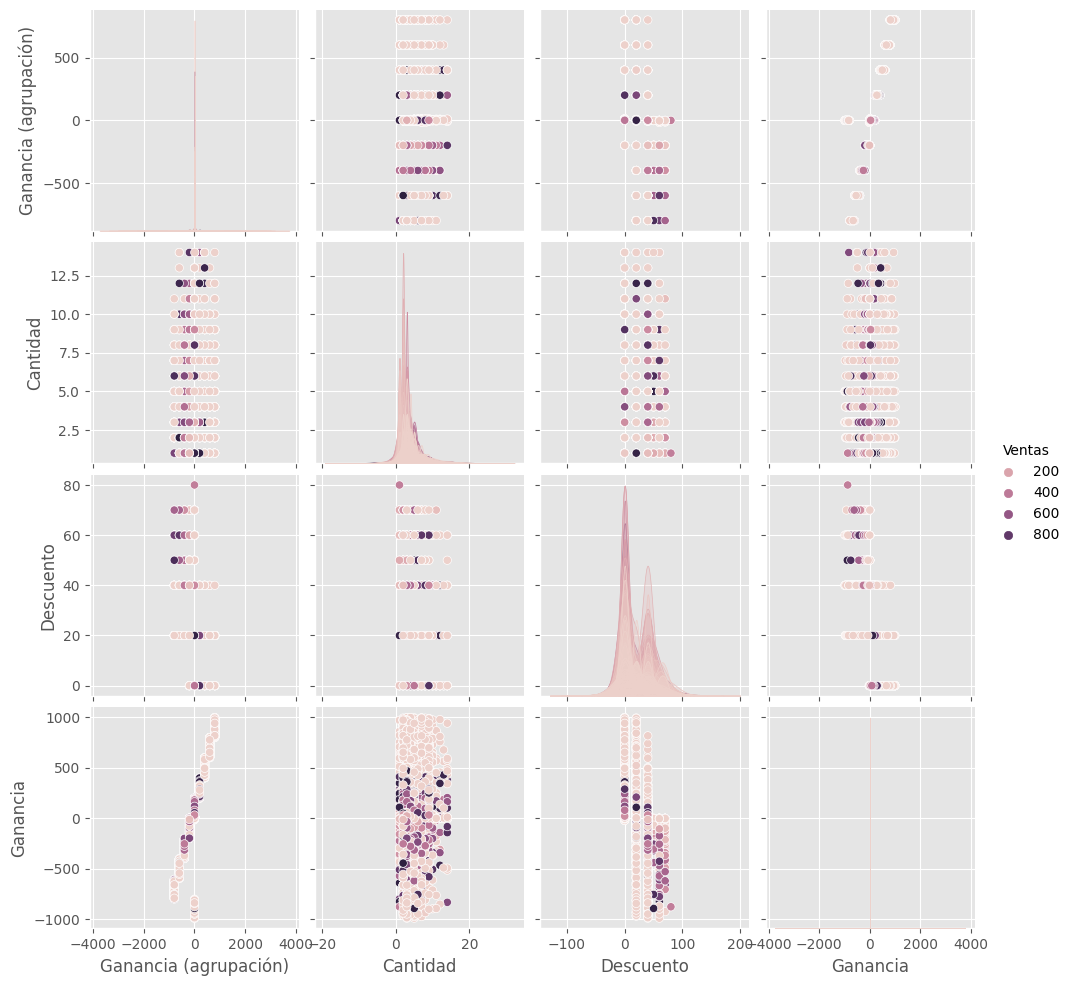

In [34]:
sns.pairplot(df, hue="Ventas")

# ¿Cómo han sido las ventas de Walmart? Considera las columnas de categorías y segmento, para tu respuesta.

R//.En lo que respecta a la evolución a lo largo de los años, se ha observado un aumento constante en las ventas. Este aumento muestra una clara frecuencia estacional, con los meses previos a diciembre (septiembre, noviembre y octubre) destacando como los periodos en los que se registran las ventas más altas. También se nota un comportamiento similar durante la mitad del año. Aunque se ha producido una disminución en las ventas en ciertos momentos, esta parece ser una tendencia natural al analizar el historial de ventas. Además, es importante destacar que todas las categorías de productos muestran un crecimiento en las ventas, pero el segmento de clientes que más contribuye a este crecimiento es el principa

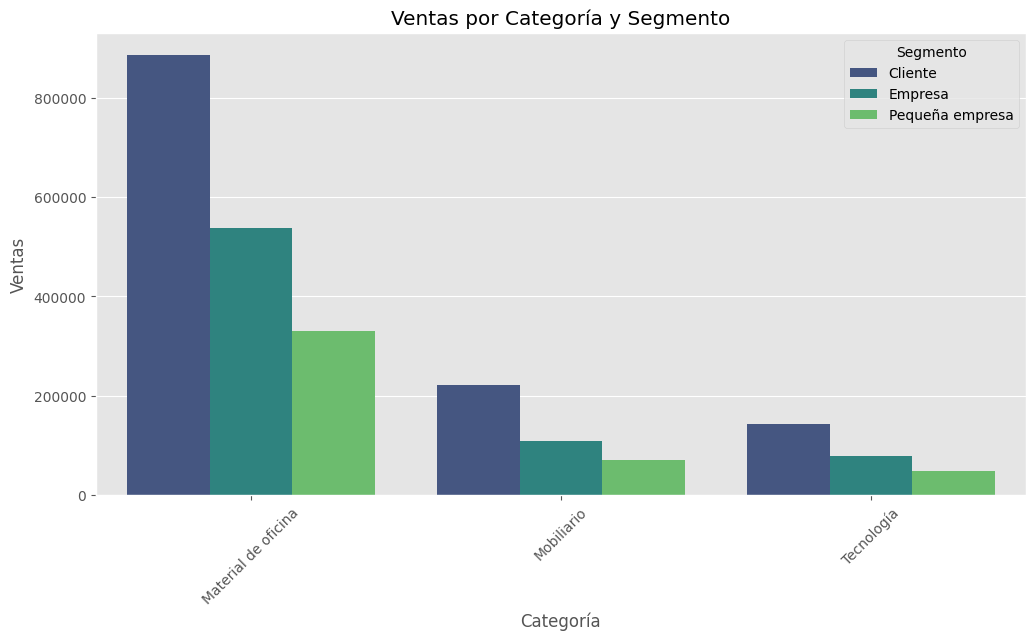

In [60]:
# Agrupar y sumar las ventas por categoría y segmento.
ventas_por_categoria_segmento = df.groupby(['Categoría', 'Segmento'])['Ventas'].sum().reset_index()

ventas_por_categoria_segmento.head(5)

# Crear un gráfico de barras agrupado.
plt.figure(figsize=(12, 6))
sns.barplot(x='Categoría', y='Ventas', hue='Segmento', data=ventas_por_categoria_segmento, palette='viridis')
plt.title('Ventas por Categoría y Segmento')
plt.xlabel('Categoría')
plt.ylabel('Ventas')
plt.xticks(rotation=45)

# Mostrar el gráfico.
plt.legend(title='Segmento', loc='upper right')
plt.show()

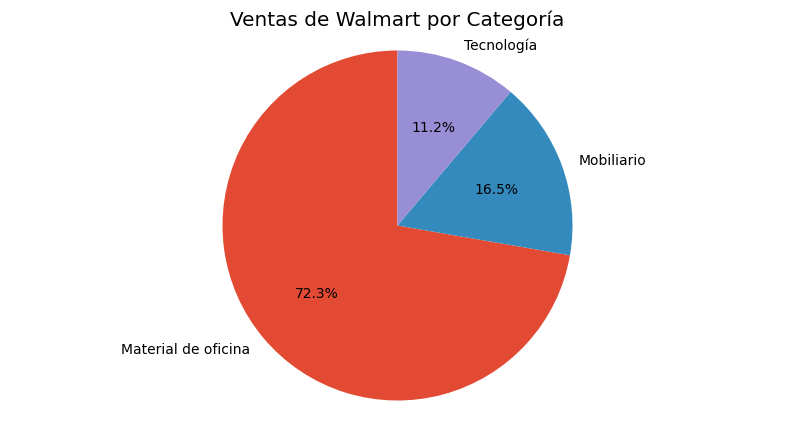

In [64]:
# Crear un pie chart para las categorías
categoria_ventas = df.groupby('Categoría')['Ventas'].sum()
plt.figure(figsize=(10, 5))
plt.pie(categoria_ventas, labels=categoria_ventas.index, autopct='%1.1f%%', startangle=90)
plt.title('Ventas de Walmart por Categoría')
plt.axis('equal')
plt.show()


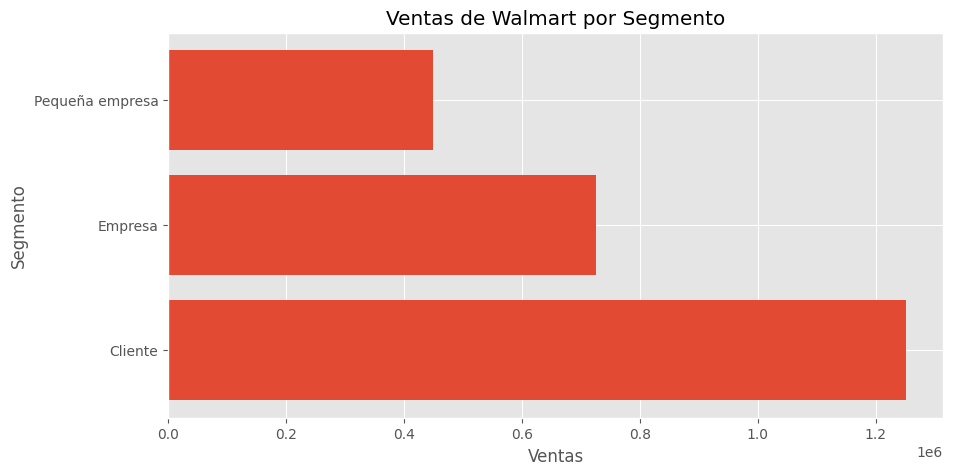

In [63]:
# Crear un piramid chart para los segmentos
segmento_ventas = df.groupby('Segmento')['Ventas'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
plt.barh(segmento_ventas.index, segmento_ventas.values)
plt.xlabel('Ventas')
plt.ylabel('Segmento')
plt.title('Ventas de Walmart por Segmento')
plt.show()

In [36]:
ventas_por_categoria_segmento.describe()

,Ventas
count,9.000000
mean,269555.575556
std,279263.986458
min,48360.469000
25%,78943.147000
50%,143831.779000
75%,330063.063000
max,885716.291000


In [37]:
import plotly.express as px

# Convertir las columnas de fechas a tipo datetime si no están en ese formato.
df['Fecha de envío'] = pd.to_datetime(df['Fecha de envío'])
df['Fecha del pedido'] = pd.to_datetime(df['Fecha del pedido'])

# Crear una nueva columna "Mes" para el mes de cada pedido.
df['Mes'] = df['Fecha del pedido'].dt.strftime('%Y-%m')

# Agrupar por mes y sumar las ventas.
ventas_por_mes = df.groupby('Mes')['Ventas'].sum().reset_index()

# Crear la visualización dinámica de ventas por mes.
fig = px.line(ventas_por_mes, x='Mes', y='Ventas', title='Ventas por Mes')
fig.update_xaxes(type='category')  # Establecer el eje x como categórico para una visualización dinámica.
fig.show()

# ¿Escogerías otras variables para complementar el análisis anterior? ¿Cuál sería y por qué?

Si,Para enriquecer el análisis, se podria considerar otras variables como las siguientes:

* Fecha de envío y Fecha del pedido: Estas variables brindarían la oportunidad de explorar tendencias temporales en las ventas y evaluar si existen patrones estacionales o cambios a lo largo del tiempo que puedan influir en los niveles de venta.

* País/Región y Provincia/Estado/Departamento: La inclusión de estas variables permitiría un análisis geoespacial para examinar las disparidades regionales en las ventas y determinar si ciertas áreas geográficas son más lucrativas que otras en términos de rendimiento de ventas.

* Método de envío: Esta variable podría ser evaluada para determinar si el método de envío tiene un impacto significativo en las ventas y si algunos métodos demuestran ser más eficaces que otros en términos de satisfacción del cliente y entrega oportuna.

* Descuento: Explorar el impacto de los descuentos en las ventas permitiría identificar si ciertos segmentos o categorías de productos son particularmente sensibles a las estrategias de descuento y si estos descuentos son rentables en términos de incremento de ventas.

* Ganancia: Analizar la relación entre las ganancias y las ventas sería útil para determinar qué categorías o segmentos generan una proporción más alta de ganancias en comparación con las ventas totales, lo que podría proporcionar información valiosa sobre la rentabilidad de diferentes productos.

# ¿Que las ventas aumenten, implica que las ganancias también lo hacen? Realiza el análisis por subcategorías, ayuda: puedes separarla por categoría para que sea más fácil graficarlo.

R// No necesariamente, la ganancia se define como la diferencia entre el precio de venta y los costos de producción, que incluyen materias primas, transporte, publicidad y otros elementos necesarios para fabricar el producto. Un mayor volumen de ventas no garantiza automáticamente una mayor ganancia, ya que podría implicar costos adicionales, como una inversión mayor en publicidad, un aumento en los costos de transporte o un incremento en los precios de las materias primas utilizadas en la producción. En consecuencia, la diferencia entre los ingresos obtenidos (precio de venta) y los costos de producción será menor en tales casos.

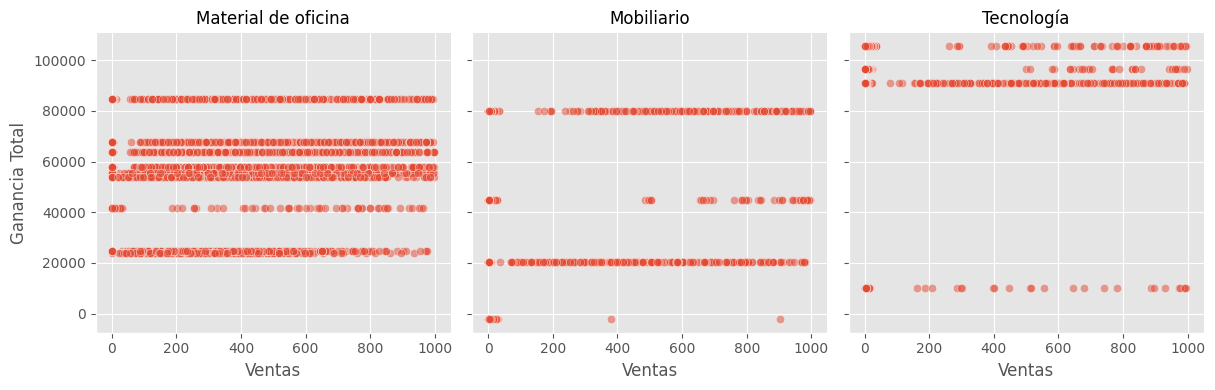

In [38]:
# Crear un nuevo DataFrame para realizar el análisis por subcategorías y categorías.
df_analysis = df[['Categoría', 'Subcategoría', 'Ventas', 'Ganancia']].copy()

# Calcular las ganancias totales por subcategoría y categoría.
df_analysis['Ganancia_total'] = df_analysis.groupby(['Categoría', 'Subcategoría'])['Ganancia'].transform('sum')

# Crear una figura con subplots por categoría.
g = sns.FacetGrid(df_analysis, col='Categoría', col_wrap=4, height=4)
g.map(sns.scatterplot, 'Ventas', 'Ganancia_total', alpha=0.5)

# Añadir títulos a los subplots.
g.set_axis_labels("Ventas", "Ganancia Total")
g.set_titles("{col_name}")

plt.tight_layout()
plt.show()

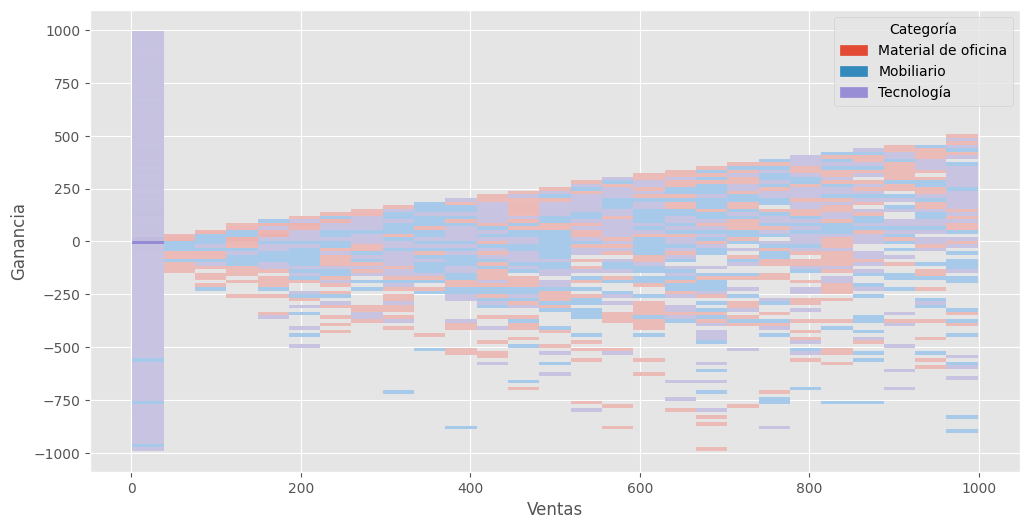

In [39]:
sns.histplot(data=df_analysis, x="Ventas", y="Ganancia",hue="Categoría", multiple="stack")
plt.show()

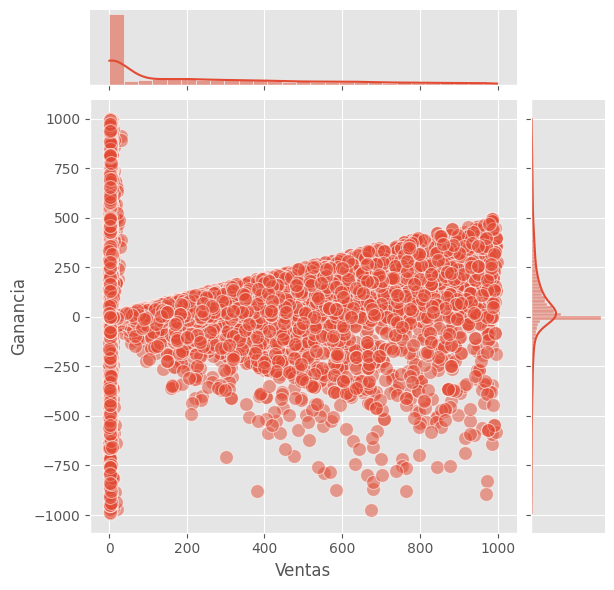

In [40]:
g = sns.JointGrid(data=df, x="Ventas", y="Ganancia")
g.plot_joint(sns.scatterplot, s=100, alpha=.5)
g.plot_marginals(sns.histplot, kde=True)

# ¿Cuál es la región que tiene mayor porción de mercado en la fecha más reciente?

R// La región que tiene la mayor proporcion de mercado en la fecha mas reciente es la Norte, ubicada en el país México, se caracteriza por tener un segmento de clientes centrado en la ciudad de Juárez y especializado en la adquisición de material de oficina.

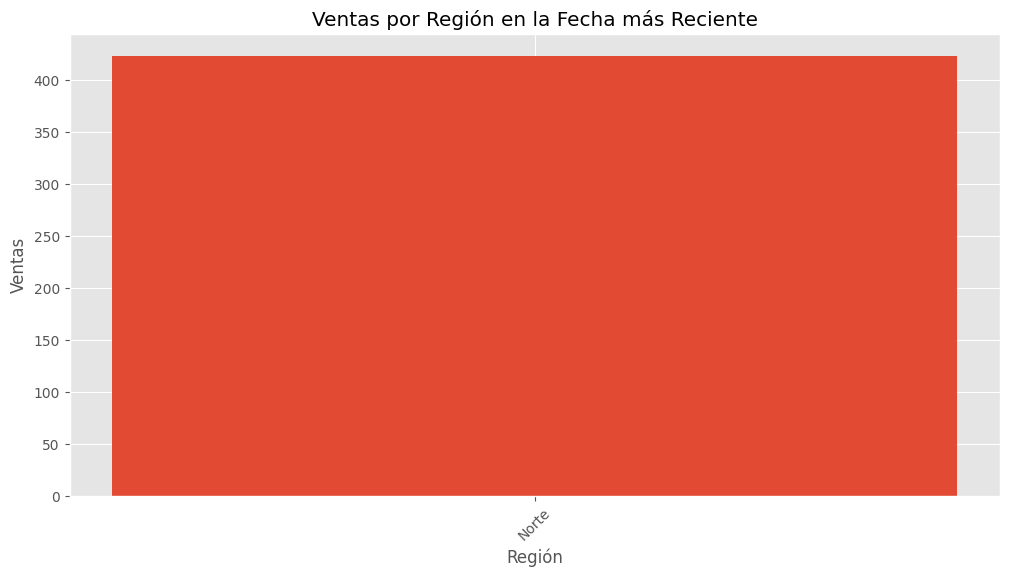

La región con la mayor porción de mercado en la fecha más reciente es: Norte


In [41]:
# 'Fecha de envío' es una cadena de texto, conviértela a tipo datetime.
df['Fecha de envío'] = pd.to_datetime(df['Fecha de envío'])

# Filtra los datos para obtener la fecha más reciente.
fecha_mas_reciente = df['Fecha de envío'].max()
df_fecha_reciente = df[df['Fecha de envío'] == fecha_mas_reciente]

# Agrupa los datos por 'Región' y calcula la suma de 'Ventas' para cada región.
ventas_por_region = df_fecha_reciente.groupby('Región')['Ventas'].sum().reset_index()

# Ordena las regiones por ventas de mayor a menor.
ventas_por_region = ventas_por_region.sort_values(by='Ventas', ascending=False)

# Plotea un gráfico de barras para mostrar las ventas por región.
plt.figure(figsize=(12, 6))
plt.bar(ventas_por_region['Región'], ventas_por_region['Ventas'])
plt.xlabel('Región')
plt.ylabel('Ventas')
plt.title('Ventas por Región en la Fecha más Reciente')
plt.xticks(rotation=45)
plt.show()

# Muestra la región con la mayor porción de mercado.
region_con_mas_ventas = ventas_por_region.iloc[0]['Región']
print(f"La región con la mayor porción de mercado en la fecha más reciente es: {region_con_mas_ventas}")


In [42]:
ventas_por_region.head()

,Región,Ventas
0,Norte,423.0


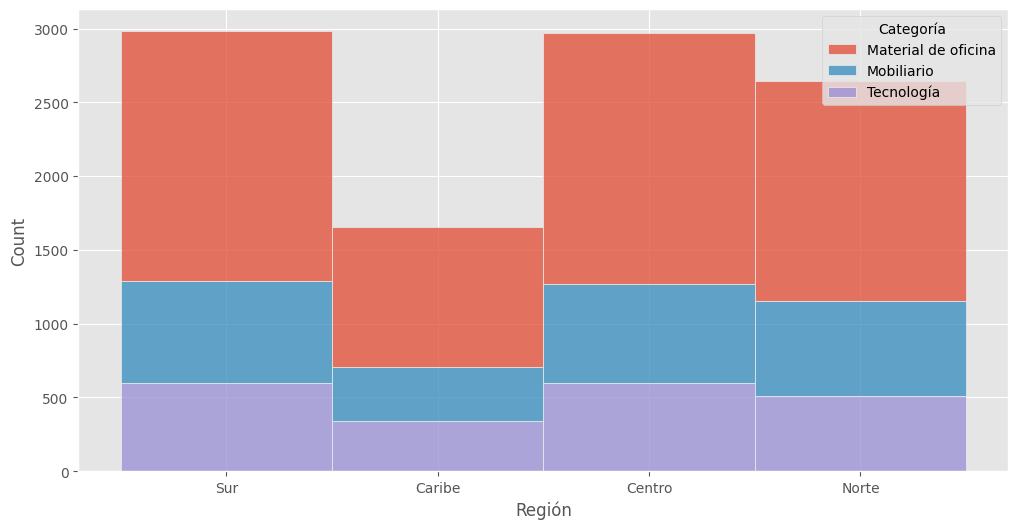

In [43]:
sns.histplot(data=df, x="Región", hue="Categoría", multiple="stack")
plt.show()

# ¿Qué otros datos utilizarías para dar una recomendación? Haz la grafica



* Realizar un analisis de venta por categorias
* Realizar un analsis de ventas por linea temporal
* Realiza un analisis de ventas por Fabricante vs zonas
* Realizar un analisis de ventas por Provincia,Estado, Departamento y ciudad.
* Realizar un analisis de ventas por metodo de envio



<ipython-input-44-489b699765e9>:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




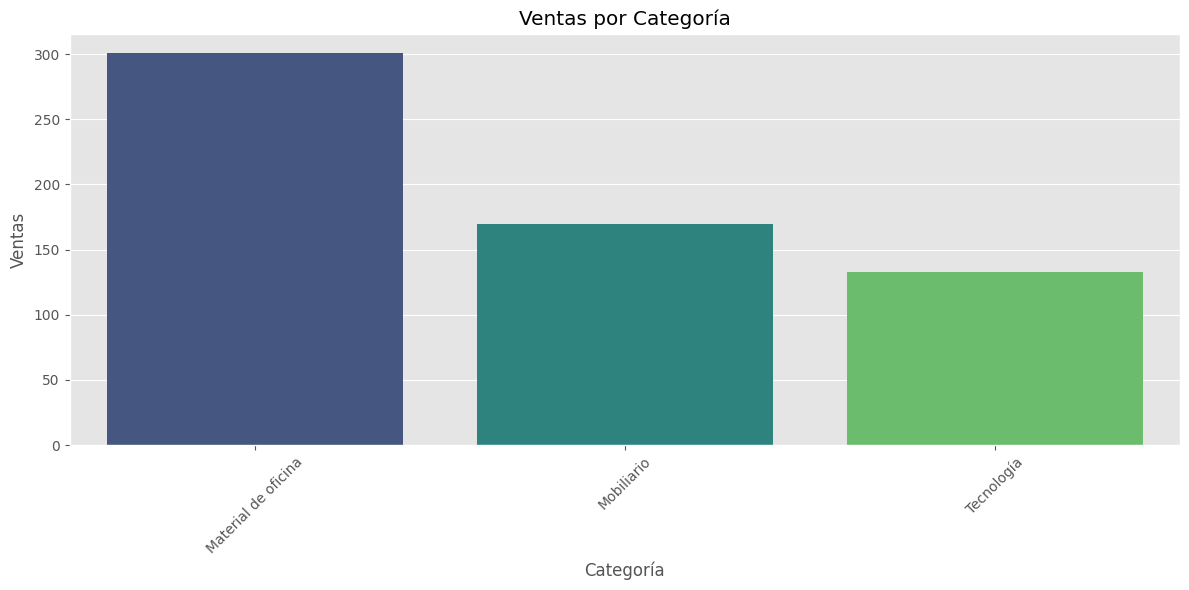

In [44]:
# Crear una visualización de ventas por categoría.
plt.figure(figsize=(12, 6))
sns.barplot(x="Categoría", y="Ventas", data=df, ci=None, palette="viridis")
plt.title("Ventas por Categoría")
plt.xlabel("Categoría")
plt.ylabel("Ventas")
plt.xticks(rotation=45)
plt.tight_layout()


<ipython-input-45-2dd99bcd3c0f>:7: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




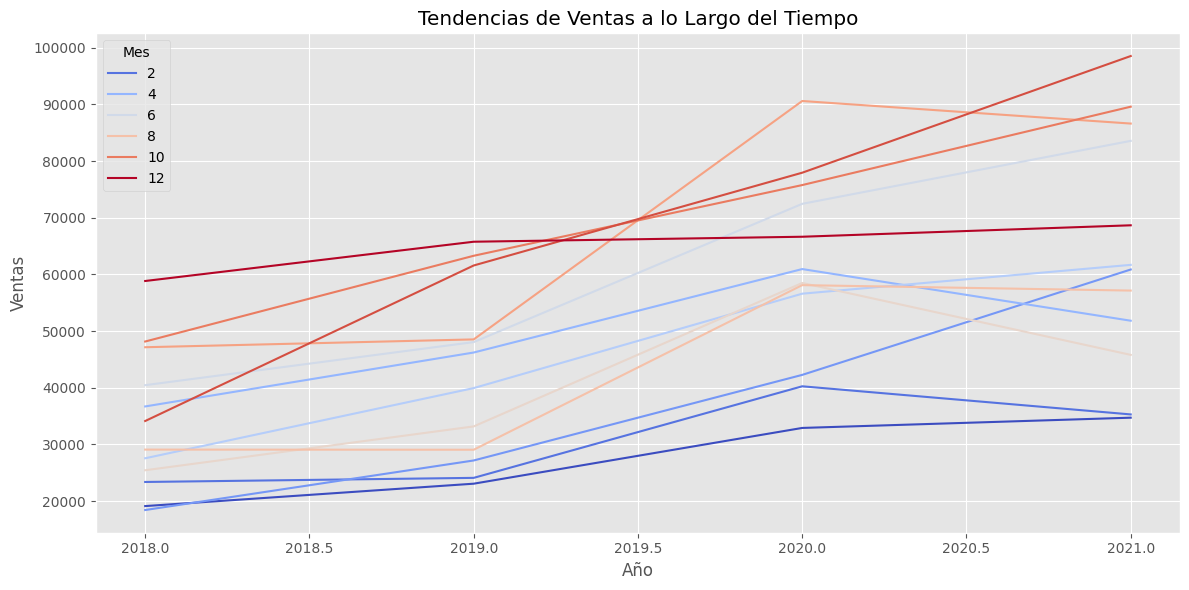

In [45]:
# Visualización de tendencias de ventas a lo largo del tiempo (Fecha de pedido).
df['Fecha del pedido'] = pd.to_datetime(df['Fecha del pedido'])
df['Año'] = df['Fecha del pedido'].dt.year
df['Mes'] = df['Fecha del pedido'].dt.month

plt.figure(figsize=(12, 6))
sns.lineplot(x="Año", y="Ventas", data=df, ci=None, estimator=sum, hue="Mes", palette="coolwarm")
plt.title("Tendencias de Ventas a lo Largo del Tiempo")
plt.xlabel("Año")
plt.ylabel("Ventas")
plt.legend(title="Mes")
plt.tight_layout()

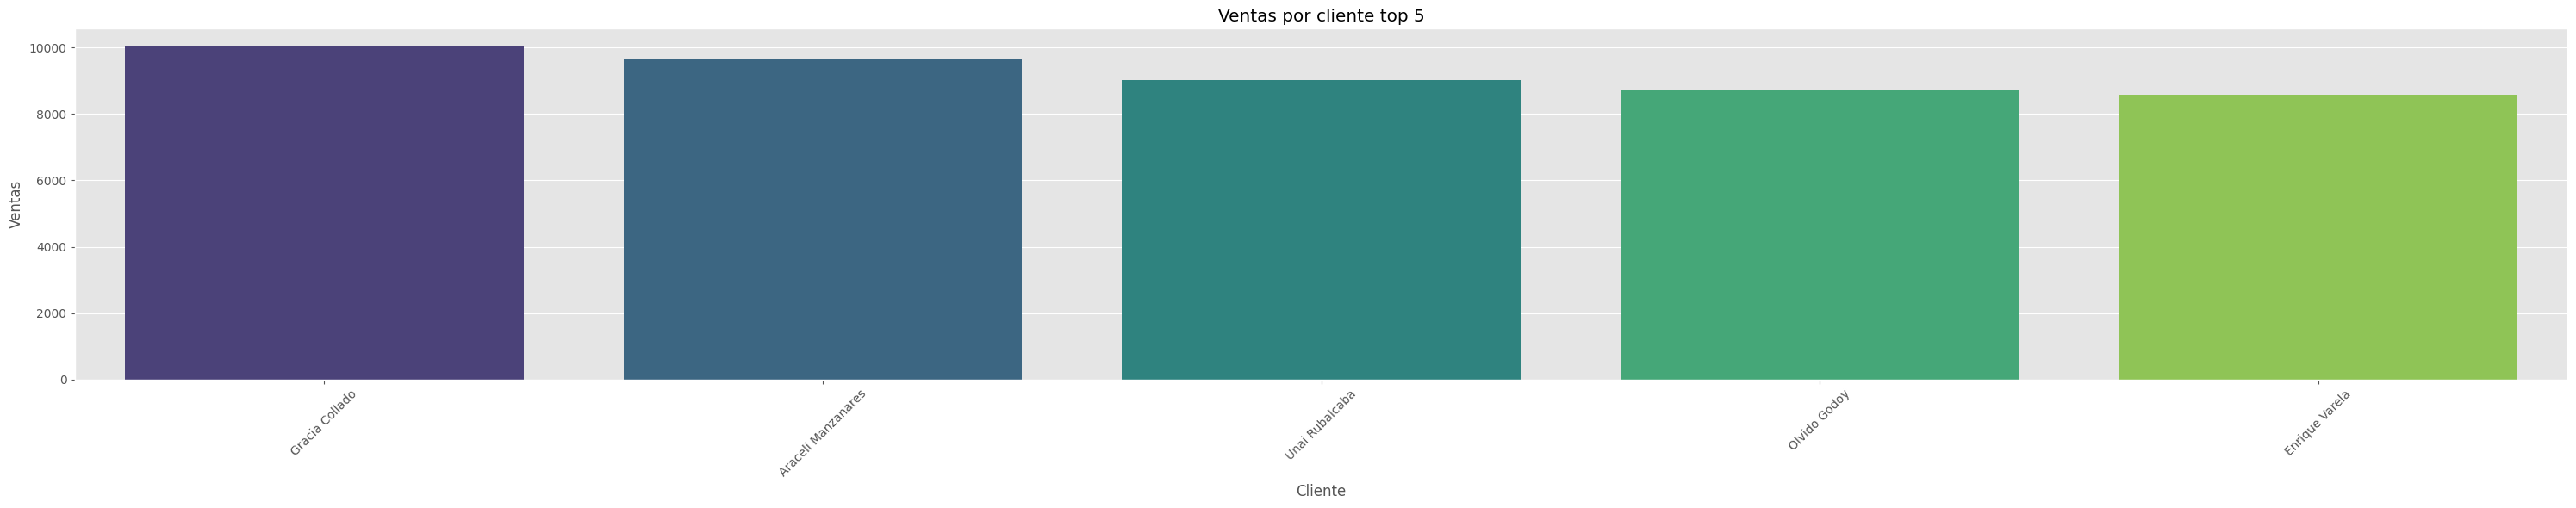

In [46]:
# Agrupar y sumar las ventas por cliente top5.
ventas_por_cliente= df.groupby(["Nombre del cliente"])['Ventas'].sum().reset_index()
ventas_por_cliente_top5 = ventas_por_cliente.sort_values(by='Ventas', ascending=False).head(5)

# Crear una visualización de ventas por .
plt.figure(figsize=(30, 6))
sns.barplot(x="Nombre del cliente", y="Ventas", data=ventas_por_cliente_top5, palette="viridis")
plt.title("Ventas por cliente top 5")
plt.xlabel("Cliente")
plt.ylabel("Ventas")
plt.xticks(rotation=45)
plt.tight_layout()


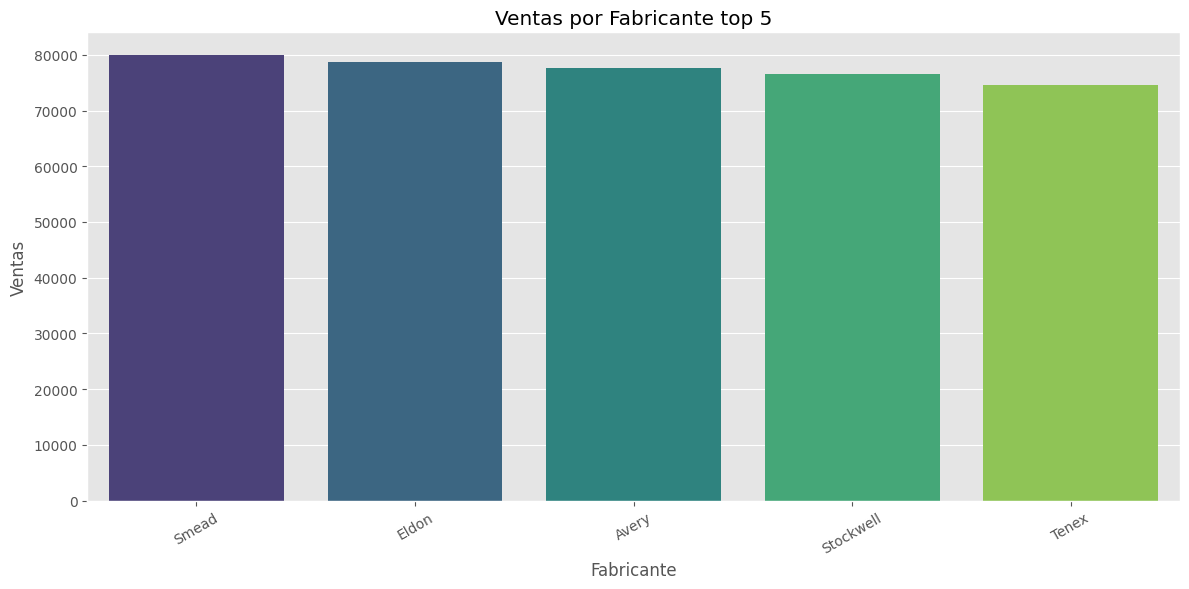

In [57]:
# Agrupar y sumar las ventas por Fabricante top5.
ventas_por_Fabricante= df.groupby(["Fabricante"])['Ventas'].sum().reset_index()
ventas_por_fabricante_top5 = ventas_por_Fabricante.sort_values(by='Ventas', ascending=False).head(5)

# Crear una visualización de ventas por .
plt.figure(figsize=(12, 6))
sns.barplot(x="Fabricante", y="Ventas", data=ventas_por_fabricante_top5, palette="viridis")
plt.title("Ventas por Fabricante top 5")
plt.xlabel("Fabricante")
plt.ylabel("Ventas")
plt.xticks(rotation=30)
plt.tight_layout()

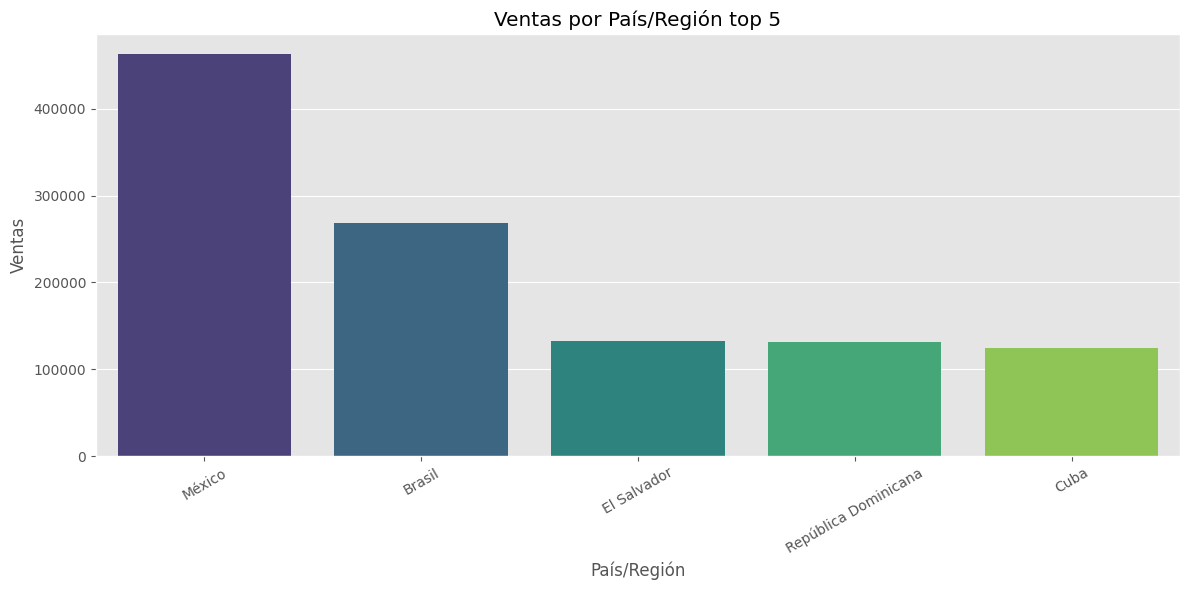

In [58]:
# Agrupar y sumar las ventas por Fabricante top5.
ventas_por_País_Región= df.groupby(["País/Región","Categoría"])['Ventas'].sum().reset_index()
ventas_por_País_Región_top5= ventas_por_País_Región.sort_values(by='Ventas', ascending=False).head(5)

# Crear una visualización de ventas por País/Región.
plt.figure(figsize=(12, 6))
sns.barplot(x="País/Región", y="Ventas", data=ventas_por_País_Región_top5, palette="viridis")
plt.title("Ventas por País/Región top 5")
plt.xlabel("País/Región")
plt.ylabel("Ventas")
plt.xticks(rotation=30)
plt.tight_layout()

In [49]:
ventas_por_País_Región_top5.head()


,País/Región,Categoría,Ventas
39,México,Material de oficina,462630.264
9,Brasil,Material de oficina,268766.661
24,El Salvador,Material de oficina,132984.643
54,República Dominicana,Material de oficina,131494.899
18,Cuba,Material de oficina,124859.216


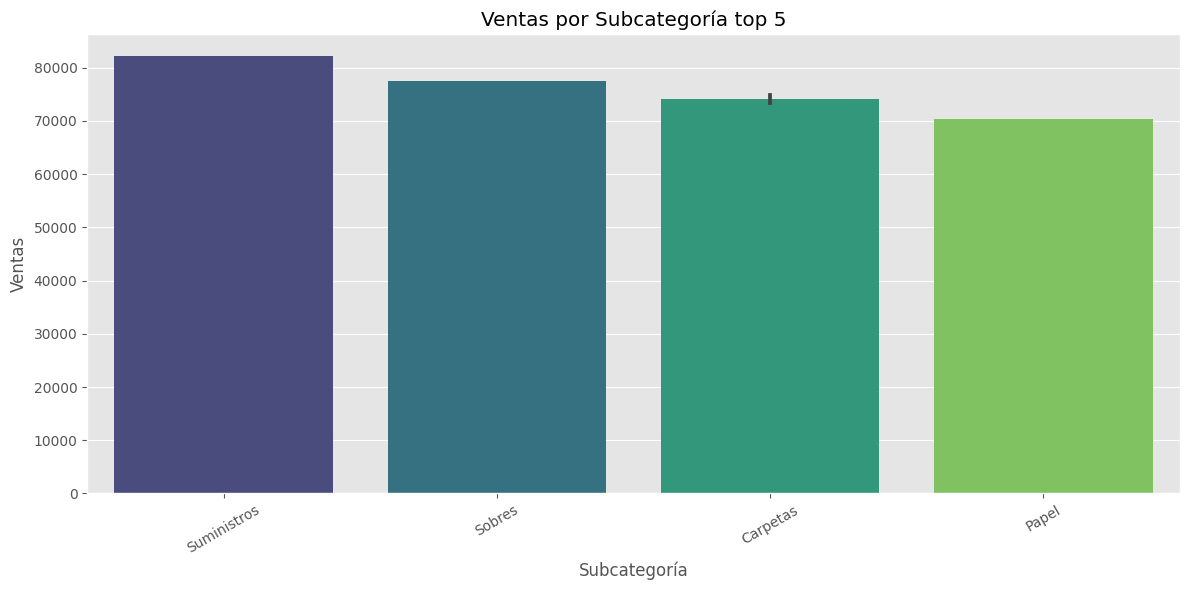

In [59]:
# Agrupar y sumar las ventas por Fabricante top5.
ventas_por_Subcategor= df.groupby(["Subcategoría","Región"])['Ventas'].sum().reset_index()
ventas_por_Subcategor_top5= ventas_por_Subcategor.sort_values(by='Ventas', ascending=False).head(5)

# Crear una visualización de ventas por País/Región.
plt.figure(figsize=(12, 6))
sns.barplot(x="Subcategoría", y="Ventas",data=ventas_por_Subcategor_top5, palette="viridis")
plt.title("Ventas por Subcategoría top 5")
plt.xlabel("Subcategoría")
plt.ylabel("Ventas")
plt.xticks(rotation=30)
plt.tight_layout()

In [51]:
ventas_por_Subcategor_top5.head()

,Subcategoría,Región,Ventas
63,Suministros,Sur,82248.944
59,Sobres,Sur,77406.875
14,Carpetas,Norte,74776.179
13,Carpetas,Centro,73331.383
49,Papel,Centro,70401.656


# Escoge una de las gráficas anteriores para presentarlas de forma dinámica.

In [52]:
pip install plotly


In [53]:

import plotly.express as px

# Convertir las columnas de fechas a tipo datetime si no están en ese formato.
df['Fecha de envío'] = pd.to_datetime(df['Fecha de envío'])
df['Fecha del pedido'] = pd.to_datetime(df['Fecha del pedido'])

# Crear una nueva columna "Mes" para el mes de cada pedido.
df['Mes'] = df['Fecha del pedido'].dt.strftime('%Y-%m')

# Agrupar por mes y sumar las ventas.
ventas_por_mes = df.groupby('Mes')['Ventas'].sum().reset_index()

# Crear la visualización dinámica de ventas por mes.
fig = px.line(ventas_por_mes, x='Mes', y='Ventas', title='Ventas por Mes')
fig.update_xaxes(type='category')  # Establecer el eje x como categórico para una visualización dinámica.
fig.show()
